In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Generating a northern cap bipolar grid

Here we present the algorithm and code for generating a compute grid for the arctic region with the north pole mapped to two separate poles on the land, i.e., a bipolar grid as described by  [Murray's 1996 paper](https://doi.org/10.1006/jcph.1996.0136) [1]. We also present an alternative construction algorithm that is hopefully easier to understand. 


## Definitions and Grid Parameters

-  globe sphere vs. earth sphere
-  ($\lambda_g$,$\phi_g$): geographical longitude and latitude of a point on a globe sphere.
-  ($\lambda_s$,$\phi_s$): 
-  ($\lambda_c$,$\phi_c$): the desired final curvilinear coordinates on the Earth sphere. 
-  $\phi_{bp}$ :    the latitude  of the bounding parallel of bipolar grid.
-  $\lambda_{bp}$ : the longitude of the split bipole(s).



## Grid Generation Algorithm

Here we construct the bipolar cap grid using a geometric method different from but inspired by Murray96.

First consider a globe sphere of radius $r$ with the regular lon,lat grid but the grid circles rotated by 90 degrees around an axis that crosses the equator at the longitude $\lambda_P+90$, where $\lambda_P$ is the desired longitude of the displaced bi-poles (-300 in MIDAS construction). We denote these sets by $\Lambda_c$ and  $\Phi_c$. Note that this coordinate patch has two opposing poles at the equator.

Next we do a stereographic projection $P_r$ of the these two sets of circles onto a plane tangent at the North pole. This results in a polar coordinate patch on that plane.

Finally we do an inverse stereographic projection $P_R^{-1}$ of these polar coordinate curves back on a sphere with a larger radius $R$ to relocate the poles to the desired latitude of the bipolar grid $\phi_P$. We denote these sets by $\Lambda_s$ and  $\Phi_s$, these form the desired orthogonal bipolar coordinate patch for the North cap.

Here's the actual grid generating algorithm:
 
*  Start with a simple lon,lat coordinate patch covering the Northern globe hemisphere:

$$\begin{align}
\lambda_g &= \lambda_{bp} + i \frac{360}{N_i} \\
\phi_g    &= j \frac{90}{N_j} \label{eq:phig}
\end{align}$$

*  Next consider the following two sets of circles $\Lambda_c$ and $\Phi_c$ on the globe sphere: 
  * $\Lambda_c$ : The set of great circles with the common axis that crosses the equator at longitude $\lambda_P$. Note that these are NOT the geographical meridians, but their 90 degrees rotated images. These circles are formed by the intersection of planes through origin with unit normal vectors ${\bf u} = ( 0,\sin\phi_g , \cos\phi_g)$ and the globe, where $\phi_g$ is the angle between ${\bf u}$ and y axis assuming we set $x$ axis in the direction of $\lambda_{bp}$. Hence they obey ${\bf u} {\bf .}  (\cos\phi \cos(\lambda-\lambda_{bp}),\cos\phi \sin(\lambda-\lambda_{bp}),\sin\phi )=0$ which gives: 
$$\begin{align}  
\tan\phi=-\tan\phi_g \sin(\lambda-\lambda_{bp}).
\end{align}$$
  
   * $\Phi_c$ : The set of parallel circles with the same axis as above. Note that these are NOT the geographical parallels, but their 90 degrees rotated images.  
These circles are formed by the intersection of planes perpendicular to the axis of the great circles above with unit normal vectors ${\bf u} = ( 1, 0, 0)$ and the globe, we set $x$ axis in the direction of $\lambda_P$. Hence they obey:

$$\begin{align} 
\cos\phi \cos(\lambda-\lambda_P) = \cos(\lambda_g-\lambda_{bp}).
\end{align}$$

*  The curvilinear coordinate patch $(\lambda_c,\phi_c)$ on the globe sphere is obtained by solving the above two equations simultaneously, yielding: 

$$\begin{align}
\frac{\sin(\lambda_c-\lambda_{bp})}{\tan\phi_c} &= -\frac{1}{\tan\phi_g}      \equiv \beta  \label{eq:beta} \\
{\cos(\lambda_c-\lambda_{bp}) \cos\phi_c}       &=  \cos(\lambda_g-\lambda_{bp})\equiv  \alpha \label{eq:alpha}
\end{align}$$

which give:

$$\begin{align}
 \phi_c &= \sin^{-1}\left[ \left(\frac{1-\alpha^2}{1+\beta^2}\right)^{1/2} \right] \label{eq:phic} \\
 \lambda_c-90 &= \sin^{-1}\left[ \left(\beta^2\frac{1-\alpha^2}{\alpha^2+\beta^2} \right)^{1/2} \right] \label{eq:lamc}
\end{align}$$

Note that because of the square roots in the above equations the signs have to be chosen so that the solution remains continuous.

* Finally to achieve the stereographic projection/re-projection (in the spirit of Murray96) we only need to observe a simple relation between the angels in the geometric construction (this is the same as Murray96 equations 1 and 2): 

$$\begin{align}
\tan(\frac{(90-\phi_s)}{2}) &= \tan(\frac{(90-\phi_{bp})}{2}) \tan(\frac{(90-\phi_c)}{2})\label{eq:geometry}\\
\lambda_s &= \lambda_c
\end{align}$$

and so:

$$\begin{align}
\phi_s &= 90 - 2 \tan^{-1}\left( r_P \tan(\frac{(90-\phi_c)}{2}) \right) ; \ \ r_P \equiv \tan(\frac{(90-\phi_{bp})}{2}) \label{eq:phis} \\
\lambda_s &= \lambda_c
\end{align}$$

### Additional degree of freedom in the grid  construction

There is an additional degree of freedom in the bipolar grid construction that if ignored would cause a difference with Murray96 grid. We can (and perhaps should) construct the initial northern globe grid latitudes $\phi_g$ not with a uniform but with a variable resolution such that the final projected/reprojected grid $\phi_s$ has the desired uniform resolution along the "symmetry meridian" of longitude $\lambda_{bp}-90$. I.e., we want

$$\begin{align}
\Delta \phi_s(\lambda_c=\lambda_P-90) = Constant = \frac{90-\phi_{bp}}{N_j}. 
\end{align}$$

We can find the required $\phi_g$ that produces this by inverting equation\eqref{eq:phis}:

$$\begin{align}
\phi_c &= 90 - 2 \tan^{-1}\left(\frac{1}{r_P} \tan(\frac{(90-\phi_s)}{2})  \right). \label{eq:inversestereog}
\end{align}$$

and noting that according to equation\eqref{eq:beta} $\phi_c=\phi_g$ along the symmetry meridian $\lambda_c=\lambda_{bp}-90$.

To summarize these transformations schematically:

$$\begin{align}
(x,y,z)&\xrightarrow{\text{Spherical latlon}} (\lambda^0_g,\phi^0_g) \\
       &\ \xrightarrow{\text{Inverse Stereographic}} (\lambda_g,\phi_g) = (\lambda^0_g,P^{-1}(\phi^0_g))  \\          &\ \ \xrightarrow{\text{Curvilinear}} (\lambda_c,\phi_c) \\
       &\ \ \ \xrightarrow{\text{Stereographic}} (\lambda_s,\phi_s) = (\lambda_c,P(\phi_c))
\end{align}$$


### Algorithm

*  Generate a mesh using simple lat-lon grid covering the cap
$$\begin{align}
(\lambda_g)_{ij} &= \lambda_{bp} + i \frac{360}{N_i} \\
(\phi_g^0)_{ij}  &= \phi_{bp} + j \frac{90 - \phi_{bp}}{N_j} \\
(\phi_g)_{ij}    &= 90 - 2 \tan^{-1}\left(\frac{1}{r_P} \tan(\frac{(90-(\phi_g^0)_j)}{2})  \right)
\end{align}$$

* Generate the mesh for $(\lambda_c)_{ij}$ and $(\phi_c)_{ij}$ using equations \eqref{eq:alpha} and \eqref{eq:beta}. Note that we should shift the $(\lambda_c)_{ij}$ by multiples of $\pi$ to be continuous with $(\lambda_g)_{ij}$ along the Equator. 

* Generate the mesh for $(\lambda_s)_{ij}$ and $(\phi_s)_{ij}$ using equations \eqref{eq:phis}.

### Metrics

We can generate the "metrics" by analytical manipulations. The length of a curve which is determined by integrating the infinitesimal length $ds$ along the curve is independent of the coordinates. This statement determines the "metric" tensor of the coordinates:

$$\begin{align}
ds^2 = \sum_{\mu,\nu} g^{\mu\nu} d\xi_\mu d\xi_\nu
\end{align}$$

In this writing $\mu$ and $\nu$ range over $1,2,3$, but the above formula is much more general than that.
For a Cartesian coordinate $g_{\mu\nu} = \delta_{\mu,\nu}$ and this is simply the Eucldian length $dx_1^2+dx_2^2+dx_3^2 = dx^2+dy^2+dz^2$. For a general orthogonal coordinate system such as $(\lambda_s,\phi_s)$ the metric is diagonal and is sometimes denoted by a set of $h$'s:

$$\begin{align}
ds^2 = \sum_{\mu} g^{\mu\mu} (d\xi_\mu)^2 \equiv \sum_{\mu} (h_\mu)^{-2} (d\xi_\mu)^2
\end{align}$$

Note that in our case the new coordinates are the indexes $(I,J)$ (captalized to avoid confusion with their descrete values $i,j$) and not $(\lambda_s,\phi_s)$! So, starting from the Cartesian coordinates $(x_1,x_2,x_3)$ and using the chain rule we get:


$$\begin{align}
ds^2 &= \sum_\mu dx_\mu^2 \nonumber \\
&=  \sum_\mu \left( \frac{\partial x_\mu}{\partial I} dI + \frac{\partial x_\mu}{\partial J} dJ  \right) ^2 \nonumber \\
&=  \sum_\mu \left[ \left( \frac{\partial x_\mu}{\partial \lambda_s} \frac{\partial \lambda_s}{\partial I} + \frac{\partial x_\mu}{\partial \phi_s} \frac{\partial \phi_s}{\partial I} \right) dI + \left( I \rightarrow J \right) dJ  \right]^2 
\end{align}$$

We can obtain the metrics formulas by considering curves along new coordinates:

$$\begin{align}
h_I^{-2} \equiv ds^2(dJ=0) = dI^2 \sum_\mu \left[ ( \frac{\partial x_\mu}{\partial \lambda_s} )^2 ( \frac{\partial \lambda_s}{\partial I} )^2 + ( \frac{\partial x_\mu}{\partial \phi_s} )^2 ( \frac{\partial \phi_s}{\partial I} )^2 + cross term \right]
\end{align}$$

Cross terms are generally zero if the new coordinates are orthogonal. We can easily verify this for the from of coordinate transformation at hand (which is a spherical lat-lon):

$$\begin{align}
x_1 &= x=\cos(\phi_s)\cos(\lambda_s) \nonumber \\
x_2 &= y=\cos(\phi_s)\sin(\lambda_s) \nonumber \\
x_3 &= z=\sin(\phi_s)
\end{align}$$

$$\begin{align}
cross term &= 2\sum_\mu()()()() = 2 (\frac{\partial  \lambda_s}{\partial I}) (\frac{\partial  \phi_s}{\partial I}) \left[ \sum_\mu (\frac{\partial x_\mu}{\partial \lambda_s}) (\frac{\partial x_\mu}{\partial \phi_s})\right] \nonumber \\
&= 2 (\frac{\partial  \lambda_s}{\partial I}) (\frac{\partial  \phi_s}{\partial I}) \left[ \cos(\phi_s)\sin(\lambda_s)\sin(\phi_s)\cos(\lambda_s) - \cos(\phi_s)\cos(\lambda_s)\sin(\phi_s)\sin(\lambda_s) \right]
&= 0
\end{align}$$

So,

$$\begin{align}
ds^2(dJ=0) = h_I^{-2} &= dI^2 \left[ ( \frac{\partial \lambda_s}{\partial I} )^2 \left( \cos^2(\phi_s)\sin^2(\lambda_s) + \cos^2(\phi_s)\cos^2(\lambda_s) + 0 \right) + ( \frac{\partial \phi_s}{\partial I} )^2 \left( \sin^2(\phi_s)\cos^2(\lambda_s) +\sin^2(\phi_s)\sin^2(\lambda_s) + \cos^2(\phi_s) \right) \right] \nonumber \\
 &= dI^2 \left[ ( \frac{\partial \lambda_s}{\partial I} )^2 \cos^2(\phi_s) + ( \frac{\partial \phi_s}{\partial I} )^2 \right] \\
ds^2(dI=0) = h_J^{-2} &= dJ^2 \left[ I \rightarrow J \right] \nonumber \\
 &= dJ^2 \left[ ( \frac{\partial \lambda_s}{\partial J} )^2 \cos^2(\phi_s) + ( \frac{\partial \phi_s}{\partial J} )^2 \right]
\end{align}$$

Applying the chain rule again we can calculate the terms one by one:
$$\begin{align}
\frac{\partial \lambda_s}{\partial I} &= \frac{\partial \lambda_c}{\partial I} \nonumber \\
&= \frac{\partial \lambda_c}{\partial \lambda_g} \frac{\partial \lambda_g}{\partial \lambda^0_g} \frac{\partial \lambda^0_g}{\partial I} + \frac{\partial \lambda_c}{\partial \phi_g} \frac{\partial \phi_g}{\partial \phi^0_g} \frac{\partial \phi^0_g}{\partial I} \nonumber \\
&= \frac{\partial \lambda_c}{\partial \lambda_g} \frac{\partial \lambda^0_g}{\partial I}   
\end{align}$$

Similarly

$$\begin{align}
\frac{\partial \phi_s}{\partial I} = \frac{\partial \phi_s}{\partial \phi_c} \frac{\partial \phi_c}{\partial \lambda_g} \frac{\partial \lambda^0_g}{\partial I} 
\end{align}$$

$$\begin{align}
\frac{\partial \lambda_s}{\partial J} = \frac{\partial \lambda_c}{\partial \phi_g} \frac{\partial \phi_g}{\partial \phi^0_g} \frac{\partial \lambda^0_g}{\partial J} 
\end{align}$$

$$\begin{align}
\frac{\partial \phi_s}{\partial J} = \frac{\partial \phi_s}{\partial \phi_c}  \frac{\partial \phi_c}{\partial \phi_g} \frac{\partial \phi_g}{\partial \phi^0_g} \frac{\partial \phi^0_g}{\partial J} 
\end{align}$$




Now by brute force differentiation of the curvilinear transformation formulas equations \eqref{eq:phic},\eqref{eq:lamc} we get

$$\begin{align}
(\frac{\partial \lambda_c}{\partial \lambda_g})^2 = \frac{1+\beta^{-2}}{(1+\alpha^2\beta^{-2})^2}
\end{align}$$


$$\begin{align}
(\frac{\partial \lambda_c}{\partial \phi_g})^2 = \frac{\alpha^2(1-\alpha^2)\beta^{-2}(1+\beta^{-2})}{(1+\alpha^2\beta^{-2})^2}
\end{align}$$

$$\begin{align}
(\frac{\partial \phi_c}{\partial \lambda_g})^2 = \frac{\alpha^2 \beta^{-2}}{1+\alpha^2\beta^{-2}}
\end{align}$$

$$\begin{align}
(\frac{\partial \phi_c}{\partial \phi_g})^2 = \frac{1-\alpha^2}{1+\alpha^2\beta^{-2}}
\end{align}$$



And similarly differentiation of the stereographic transformation formula equations \eqref{eq:phis},\eqref{eq:inversestereog} yield:

$$\begin{align}
M^{-1} \equiv \frac{\partial \phi_s}{\partial \phi_c} &= r_P \frac{1+\tan^2(\chi_c/2)}{1+r^2_P\tan^2(\chi_c/2)} ; \ \ \chi_c \equiv 90-\phi_c \nonumber \\
N \equiv \left(\frac{\partial \phi_g}{\partial \phi^0_g} \right)^{-1} &= r_P \frac{1+\tan^2(\chi_g/2)}{1+r^2_P\tan^2(\chi_g/2)}; \ \ \chi_g \equiv 90-\phi_g
\end{align}$$

We note that

$$\begin{align}
\frac{\partial \lambda^0_g}{\partial I} = 2\pi/N_i
\frac{\partial \phi^0_g}{\partial J} = (90-\phi_{bp})/N_j
\end{align}$$

Putting it all together we finally obtain the metric terms

$$\begin{align}
h^{-2}_I &= \left[ \cos^2(\phi_s) \frac{1+\beta^{-2}}{(1+\alpha^2\beta^{-2})^2} + M^{-2}  \frac{\alpha^2 \beta^{-2}}{1+\alpha^2\beta^{-2}}\right] \left( \frac{2\pi}{N_i} \right)^2 \\
h^{-2}_J &= \left[ \cos^2(\phi_s) N^{-2} \frac{\alpha^2(1-\alpha^2)\beta^{-2}(1+\beta^{-2})}{(1+\alpha^2\beta^{-2})^2} +  M^{-2}N^{-2} \frac{1-\alpha^2}{1+\alpha^2\beta^{-2}} \right] \left( \frac{\pi/2-\phi_{bp}}{N_j} \right)^2 
\end{align}$$

The value of the metric tensor is that it can yield the infinitesimal length along coordinate curves. Noting that $dI=dJ=1$ for a grid element we have:

$$\begin{align}
i-direction\  length\  element &= \sqrt{ds^2(dI=1,dJ=0)} = h^{-1}_I \\
j-direction\  length\  element &= \sqrt{ds^2(dI=0,dJ=1)} = h^{-1}_J \\
grid-cell\ \ \ area\  element &= h^{-1}_I . h^{-1}_J
\end{align}$$

And these are what the genereting tool writes to file as the distance and area elements.


### Murray 96 Formulas

Murray's grid is based on the same idea of projecting and re-projecting from globe sphere to plane to Earth sphere, with the difference that he has the plane tangent at the equator at the longitude of the desired final bipoles. Hence he has an extra 90 degrees rotation to deal with to bring the grid onto the Northern cap. This is rather complicated since it exchanges the roles of latitude and longitude at some point in the construction which is not totally explained in his paper. Otherwise the form of the constructing formulas are equivalent to the ones above in spirit , but left their interpretation is not clear. We copy Murray 96 formulas below for comparison. 

Murray96 equations (1) and (2) are 

$$\begin{align}
Murray1:\ \ \ \ &\tan(\frac{\chi_s}{2}) = r_P \tan(\frac{\chi_c}{2})\\
Murray2:\ \ \ \ &r_P  = \tan(\frac{\chi_P}{2}) 
\end{align}$$

This is a geometric property of a stereographic projection of sphere onto a tangent plane and then projecting back onto a sphere of larger radius tangent at the same point to the plane. These two sphere have a common axis $RQ$ passing through their centers and the tangent point and these are simple the relations between three spherical angels; 1)  $\chi_P$ is the spherical angle between $RQ$ and the line joining the center of the (larger) earth sphere to the north pole of the (smaller) globe sphere, 2) $\chi_c$ is the spherical angle between $RQ$ and the line joining the center of the globe sphere to a given point $X$ on that sphere, 3) $\chi_s$ is the spherical angle between $RQ$ and the line joining the center of the Earth sphere to the re-pojected image of the point $X$ on that sphere (refer to FIG.3 of Murray96).

Murray96 equations (5) and (6) for generating the curvilinear grid are 

$$\begin{align}
Murray5a:\ \ \ \ \lambda_s &= \lambda_0 + 90 - atan2(sin\lambda_c,\tan\phi_c)\\
Murray5b:\ \ \ \ \phi_s &= 90 - 2\tan^{-1}\left( r_p \tan(\frac{\chi_c}{2}) \right) \\
Murray6:\ \ \ \ \chi_c &= \cos^{-1}\left( \cos\lambda_c \cos\phi_c \right) 
\end{align}$$


### Compare with Murray 96

The above equation\eqref{eq:phis} would be identical to Murray's Eq(5b) if we assume $\chi_c = 90-\phi_c$. But then Murray's Eq(6) $\cos\chi_c = \cos\lambda_c \cos\phi_c$, would be in conflict with that assumption (relates $\phi_c$ to $\lambda_c$)! On the other hand Murray's Eq(6) is somewhat similar to the equation \eqref{eq:alpha} above if we assume $\chi_c=\lambda_g-\lambda_P$, which would then be in apparent conflict with equation\eqref{eq:phis} above. 

Murray's Eq(5a) is similar to equation\eqref{eq:beta} above if we assume that $\lambda_s-\lambda_P=\phi_g$, which is again in apparent conflict with all other equations.

Moreover in MIDAS (and FMS) implementation $\lambda_c$ and $phi_c$ are derived from $\phi_g$ and $\lambda_g$ respectively, contrary to the intuition ($\lambda_c$ is derived via solving Murray's Eq(5a) for $\lambda_c$ at $\phi_c=0$ given $\lambda_s=\phi_g$ and \phi_c is set to $90-\lambda_g$.) 

All these conflicts point to a subtle switching of the roles of latitude and longitude at the connection line in the transformation defined in Murray which he mentions only in passing at section 2.2. 

## References

[1] [Explicit Generation of Orthogonal Grids for Ocean Models, Ross J.Murray, Journal of Computational Physics
Volume 126, Issue 2, July 1996, Pages 251-273](https://doi.org/10.1006/jcph.1996.0136)



# Implementation (Alternative to Murray96)

## helper routines and constants

In [5]:
#General imports and definitions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
PI_180 = np.pi/180.

#Constants
PI_180 = np.pi/180.
_default_Re = 6.378e6

#utility function to plot grids 
def plot_mesh_in_latlon(lam, phi, stride=1, phi_color='k', lam_color='r'):
    if (phi.shape != lam.shape): raise Exception('Ooops: lam and phi should have same shape')
    nj,ni = lam.shape
    for i in range(0,ni,stride):
        plt.plot(lam[:,i],phi[:,i],lam_color)
    for j in range(0,nj,stride):
        plt.plot(lam[j,:],phi[j,:],phi_color)
#plot_mesh_in_latlon(lams,phis,stride=16)
def plot_mesh_in_xyz(lam, phi, stride=1, phi_color='k', lam_color='r'):
    x = np.cos(phi*PI_180) * np.cos(lam*PI_180)
    y = np.cos(phi*PI_180) * np.sin(lam*PI_180)
    z = np.sin(phi*PI_180)
    plot_mesh_in_latlon(x, y, stride=stride, phi_color=phi_color, lam_color=lam_color)
#plt.figure(figsize=(6,6))
#plot_mesh_in_xyz(lams, phis, stride=20)

def mdist(x1,x2):
  """Returns positive distance modulo 360."""
  a=np.mod(x1-x2+720.,360.)
  b=np.mod(x2-x1+720.,360.)
  d=np.minimum(a,b)
  return d
def generate_grid_metrics(x,y,axis_units='degrees',Re=_default_Re, latlon_areafix=False):
    nytot,nxtot = x.shape
    if  axis_units == 'm':
      metric=1.0
    if  axis_units == 'km':            
      metric=1.e3
    if  axis_units == 'degrees':                        
      metric=Re*PI_180
    ymid_j = 0.5*(y+np.roll(y,shift=-1,axis=0))
    ymid_i = 0.5*(y+np.roll(y,shift=-1,axis=1))      
    dy_j = np.roll(y,shift=-1,axis=0) - y
    dy_i = np.roll(y,shift=-1,axis=1) - y
    dx_i = mdist(np.roll(x,shift=-1,axis=1),x)
    dx_j = mdist(np.roll(x,shift=-1,axis=0),x)
    dx = metric*metric*(dy_i*dy_i + dx_i*dx_i*np.cos(ymid_i*PI_180)*np.cos(ymid_i*PI_180))
    dx = np.sqrt(dx)
    dy = metric*metric*(dy_j*dy_j + dx_j*dx_j*np.cos(ymid_j*PI_180)*np.cos(ymid_j*PI_180))
    dy = np.sqrt(dy)
    dx=dx[:,:-1]
    dy=dy[:-1,:]
    if(latlon_areafix):
        delsin_j = np.roll(np.sin(y*PI_180),shift=-1,axis=0) - np.sin(y*PI_180)
        area=metric*metric*dx_i[:-1,:-1]*delsin_j[:-1,:-1]/PI_180
    else:
        area=dx[:-1,:]*dy[:,:-1]    
    angle_dx=np.zeros((nytot,nxtot))
#    angle_dx = np.arctan2(dy_i,dx_i)/PI_180      
#    self.angle_dx = numpy.arctan2(dy_i,dx_i)*180.0/numpy.pi
    # The commented out code above was incorrect for non-Cartesian grids
    # The corrected version, in addition to including spherical metrics, is centered in the interior and one-sided at the grid edges
    angle_dx[:,1:-1] = np.arctan2(y[:,2:]-y[:,:-2],(x[:,2:]-x[:,:-2])*np.cos(y[:,1:-1]*PI_180))
    angle_dx[:,0]    = np.arctan2(y[:,1] -y[:,0]  ,(x[:,1] -x[:,0]  )*np.cos(y[:,0]*PI_180))
    angle_dx[:,-1]   = np.arctan2(y[:,-1]-y[:,-2] ,(x[:,-1]-x[:,-2] )*np.cos(y[:,-1]*PI_180))
    angle_dx = angle_dx /PI_180
    return dx,dy,area,angle_dx


def write_nc(x,y,dx,dy,area,angle,axis_units='degrees',fnam=None,format='NETCDF3_CLASSIC'):
    import netCDF4 as nc

    if fnam is None:
      fnam='supergrid.nc'
    f=nc.Dataset(fnam,'w',format=format)
    dims=[]
    vars=[]
    nytot,nxtot = y.shape
    nyp=f.createDimension('nyp',nytot)
    nxp=f.createDimension('nxp',nxtot)
    ny=f.createDimension('ny',nytot-1)
    nx=f.createDimension('nx',nxtot-1)    
    yv=f.createVariable('y','f8',('nyp','nxp'))
    xv=f.createVariable('x','f8',('nyp','nxp'))    
    yv.units=axis_units
    xv.units=axis_units 
    yv[:]=y
    xv[:]=x
    dyv=f.createVariable('dy','f8',('ny','nxp'))
    dyv.units='meters'
    dyv[:]=dy
    dxv=f.createVariable('dx','f8',('nyp','nx'))
    dxv.units='meters'
    dxv[:]=dx
    areav=f.createVariable('area','f8',('ny','nx'))
    areav.units='m2'
    areav[:]=area
    anglev=f.createVariable('angle_dx','f8',('nyp','nxp'))
    anglev.units='degrees'
    anglev[:]=angle            
    f.sync()
    f.close()

def generate_latlon_grid(lni,lnj,llon0,llen_lon,llat0,llen_lat):
    llonSP = llon0 + np.arange(lni+1) * llen_lon/lni
    llatSP = llat0 + np.arange(lnj+1) * llen_lat/lnj
    llamSP = np.tile(llonSP,(lnj+1,1)) 
    lphiSP = np.tile(llatSP.reshape((lnj+1,1)),(1,lni+1)) 
    return llamSP,lphiSP

def area_error(lam_,phi_,lat1,lat2=90):
    #generate the metrics
    dx_,dy_,area_,angle_ = generate_grid_metrics(lam_,phi_,axis_units='degrees')
    if(lat2 == 90):
        exact_area = 2*np.pi*(Re**2)*(1-np.sin(lat1*PI_180))
    error = 100*(np.sum(area_)-exact_area)/exact_area
    return error


def metrics_error(dx_,dy_,area_,lat1,lat2=90,Re=_default_Re):
    exact_area = 2*np.pi*(Re**2)*(np.sin(lat2*PI_180)-np.sin(lat1*PI_180))
    exact_lat_arc_length = (lat2-lat1)*PI_180*Re  
    exact_lon_arc_length = np.cos(lat1*PI_180) *2*np.pi*Re

    if(lat2 == -90):
        grid_lat_arc_length = (np.sum(dy_[:,0])+np.sum(dy_[:,Ni//2]))/2
        grid_lon_arc_length = np.sum(dx_[-1,:])
    else:
        grid_lat_arc_length = np.sum(dy_[:,Ni//4])
        grid_lon_arc_length = np.sum(dx_[0,:])
        
    area_error = 100*(np.sum(area_)-exact_area)/exact_area
    lat_arc_error = 100*(grid_lat_arc_length - exact_lat_arc_length)/exact_lat_arc_length
    lon_arc_error = 100*(grid_lon_arc_length -  exact_lon_arc_length)/exact_lon_arc_length
    
    return area_error,lat_arc_error,lon_arc_error


## grid parameters¶

In [2]:
# Specify the grid properties
# All
# Specify the desired resolution
degree_resolution_inverse = 4 #quarter degree grid
refine=2    # Set to 2 for supergrid
lenlon=360  # global longitude range
lon0=-300.  # Starting longitude (longitude of the Northern bipoles)
Ni = lenlon*refine*degree_resolution_inverse

#Mercator grid
phi_s_Merc, phi_n_Merc = -66.85954724706843, 64.0589597296948

#Southern grid
Nj_SO=110*refine
lat0_SO=-78.0
lenlat_SO = phi_s_Merc-lat0_SO 

#Southern cap
Nj_scap=80*refine
lon_dp=100.0  # longitude of the displaced pole  
r_dp=0.20
doughnut=0.12

#Northern bipolar cap
Nj_ncap=119*refine
lon_bp=lon0 # longitude of the displaced pole(s)
lat0_bp=phi_n_Merc #61.247692871618455 #mercator.y.max()
lenlat_bp=90.0-lat0_bp


## Implement new algorithm

In [12]:
def generate_bipolar_cap_grid_and_metrics(Ni,Nj_ncap,lat0_bp,lon_bp,lenlon):
    print( 'Generating bipolar grid bounded at latitude ',lat0_bp  )
    rp=np.tan(0.5*(90-lat0_bp)*PI_180)
    #First define a (lon,lat) coordinate on the Northern hemisphere of the globe sphere
    #such that the resolution of latg matches the desired resolution of the final grid along the symmetry meridian 
    lon_g = lon_bp  + np.arange(Ni+1) * lenlon/Ni 
    lamg = np.tile(lon_g,(Nj_ncap+1,1)) 
    latg0_cap = lat0_bp + np.arange(Nj_ncap+1) * (90-lat0_bp)/Nj_ncap
    phig0 = np.tile(latg0_cap.reshape((Nj_ncap+1,1)),(1,Ni+1))
    ### symmetry meridian resolution fix 
    phig = 90-2*np.arctan(np.tan(0.5*(90-phig0)*PI_180)/rp)/PI_180

    #Simplify  the formulas to avoid division by zero
    #alpha  = np.cos((lamg-lon_bp)*PI_180) 
    alpha2 = (np.cos((lamg-lon_bp)*PI_180))**2
    #beta = -np.cotan(phig*PI_180)
    beta2_inv = (np.tan(phig*PI_180))**2
    
    A=np.sqrt(1-alpha2)*np.sin(phig*PI_180) #Actually two equations  +- |A|    
    B=np.sqrt((1-alpha2)/(1+alpha2*beta2_inv)) #Actually two equations  +- |B|
#   Equivalently we can do the following which has manifest symmetry lam --> 180+lam
#    A=np.sin((lamg-lon_bp)*PI_180)*np.sin(phig*PI_180) #Actually two equations  +- |A|
#    A=np.where((lamg-lon_bp)>180,-A,A)
#    
#    B=np.sin((lamg-lon_bp)*PI_180)/np.sqrt(1+alpha2*beta2_inv) #Actually two equations  +- |B|
#    B=np.where((lamg-lon_bp)>180,-B,B)

    #Deal with beta=0
    B=np.where(np.abs(beta2_inv)>1.0E10 , 0.0, B)
    
    lamc = np.arcsin(B)/PI_180
    #phic = np.arcsin(A)/PI_180
    #or use
    chic = np.arccos(A)

    ##But this equation accepts 4 solutions for a given B, {l, 180-l, l+180, 360-l } 
    ##We have to pickup the "correct" root. 
    ##One way is simply to demand lamc to be continuous with lam on the equator phi=0
    ##I am sure there is a more mathematically concrete way to do this.
    lamc = np.where((lamg-lon_bp>90)&(lamg-lon_bp<=180),180-lamc,lamc)
    lamc = np.where((lamg-lon_bp>180)&(lamg-lon_bp<=270),180+lamc,lamc)
    lamc = np.where((lamg-lon_bp>270),360-lamc,lamc)
    #Along symmetry meridian choose lamc
    lamc = np.where((lamg-lon_bp==90),90,lamc)    #Along symmetry meridian choose lamc=90-lon_bp
    lamc = np.where((lamg-lon_bp==270),270,lamc)  #Along symmetry meridian choose lamc=270-lon_bp    
    lams = lamc + lon_bp

    ##Project back onto the larger (true) sphere so that the projected equator shrinks to latitude \phi_P=lat0_tp
    ##then we have tan(\phi_s'/2)=tan(\phi_p'/2)tan(\phi_c'/2)

    #phis = 90 - 2 * np.arctan(rp * np.tan(0.5*(90-phic)*PI_180))/PI_180
    #or equivalently
    phis = 90 - 2 * np.arctan(rp * np.tan(chic/2))/PI_180
    
    ##Calculate the Metrics
    M_inv = rp * (1 + (np.tan(chic/2))**2) / (1 + (rp*np.tan(chic/2))**2)
    M = 1/M_inv
    chig = (90-phig)*PI_180
    N     = rp * (1 + (np.tan(chig/2))**2) / (1 + (rp*np.tan(chig/2))**2)
    N_inv = 1/N
    
    cos2phis = (np.cos(phis*PI_180))**2 

    h_j_inv = cos2phis*alpha2*(1-alpha2)*beta2_inv*(1+beta2_inv)/(1+alpha2*beta2_inv)**2 \
            +  M_inv*M_inv*(1-alpha2)/(1+alpha2*beta2_inv) 
    h_j_inv = np.sqrt(h_j_inv)*N_inv*(90-lat0_bp)*PI_180/Nj_ncap
    h_j_inv = h_j_inv[:-1,:]
    #Note that along the symmetry meridian lamg-lon_bp=90 we have alpha2=0, also A=sin(phig) so chig=phis and 
    #N=M_inv hence N*M(along the symmetry meridian) = 1 , hence h_j_inv(along the symmetry meridian) = 1  

    h_i_inv = cos2phis * (1+beta2_inv)/(1+alpha2*beta2_inv)**2 + M_inv*M_inv*alpha2*beta2_inv/(1+alpha2*beta2_inv)
    h_i_inv = np.sqrt(h_i_inv)*(2*np.pi/Ni)
    h_i_inv = h_i_inv[:,:-1]
    #Note that along the joint latitude  phig=0 and so beta2_inv=0, 
    #hence as expected h_i_inv(joint latitude)=cos(joint latitude)
    
    
    return lams,phis,h_i_inv,h_j_inv

lams,phis,h_i_inv,h_j_inv = generate_bipolar_cap_grid_and_metrics(Ni,Nj_ncap,lat0_bp=lat0_bp,lon_bp=lon_bp,lenlon=lenlon)

delta_phis = np.roll(phis,shift=-1,axis=0) - phis
delta_phis = delta_phis[:-1,:]
dy=h_j_inv #*dj=1

delta_lams = np.roll(lams,shift=-1,axis=1) - lams
delta_lams = delta_lams[:,:-1]
dx=h_i_inv #*dj=1

dxdy = dx[:-1,:]*dy[:,:-1]
print('area_from_hs',np.sum(dxdy))

#calculate the approximate metrics
dx2,dy2,area2,angle = generate_grid_metrics(lams,phis,axis_units='degrees',Re=1, latlon_areafix=False)

print("symmetry lat check")
sym_delPhi = (90-lat0_bp)/Nj_ncap
print("del wanted ",sym_delPhi)
print("delta_phis ",delta_phis[0,Ni//4],delta_phis[200,Ni//4])
print("delta_y    ",dy[0,Ni//4]/PI_180,dy[200,Ni//4]/PI_180)
print("delta_y2   ",dy2[0,Ni//4]/PI_180,dy2[200,Ni//4]/PI_180)
print("starting lon check")
lat0_delLam = np.cos(lat0_bp*PI_180)/degree_resolution_inverse/2
print("del wanted ",lat0_delLam)
print("delta_lams ",delta_lams[0,0],delta_lams[0,Ni//4])
print("delta_x    ",dx[0,0]/PI_180,dx[0,Ni//4]/PI_180)
print("delta_x2   ",dx2[0,0]/PI_180,dx2[0,Ni//4]/PI_180)

#generate the metrics
print("%MIDAS errors in (area,lat arc,lon arc)", metrics_error(dx2, dy2, area2,lat1=phi_n_Merc,Re=1))
print("%NEW   errors in (area,lat arc,lon arc)", metrics_error(dx,  dy,  dxdy, lat1=phi_n_Merc,Re=1))


Generating bipolar grid bounded at latitude  64.0589597296948
area_from_hs 0.6335844350466246
symmetry lat check
del wanted  0.10899596752229074
delta_phis  0.10899596752229002 0.10899596752229002
delta_y     0.10899596752229074 0.10899596752229072
delta_y2    0.10899596752229002 0.10899596752229002
starting lon check
del wanted  0.05468075231986765
delta_lams  0.125 0.12500000000028422
delta_x     0.05468075231986765 0.05468075231986765
delta_x2    0.054680752319867645 0.05468075231996711
%MIDAS errors in (area,lat arc,lon arc) (0.11229206605698669, 1.2260706002235036e-14, -2.4235787933644743e-13)
%NEW   errors in (area,lat arc,lon arc) (0.08214663155286679, -1.2260706002235036e-14, 1.6157191955763162e-14)


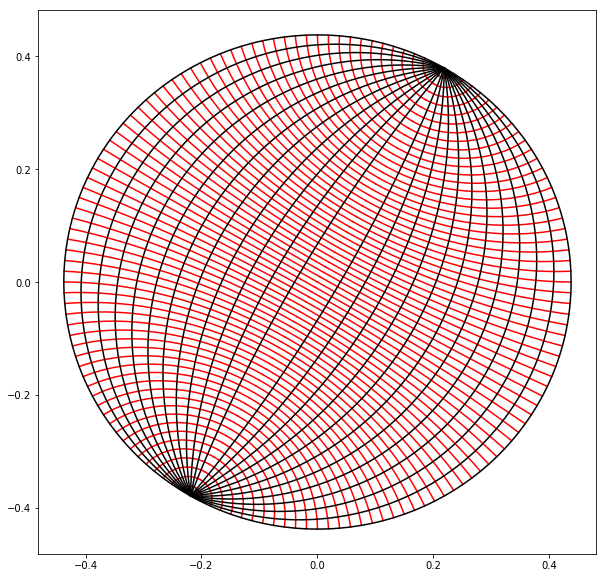

In [4]:
plt.figure(figsize=(10,10))
plot_mesh_in_xyz(lams, phis, stride=20)


## Generate grid via MIDAS 

### Direct MIDAS call

generated a tripolar supergrid of size (ny,nx)=  238 2880
tripolar grid starting longitude =  -300.0
tripolar grid starting latitude =  64.0589597297
(239, 2881) (239, 2881)


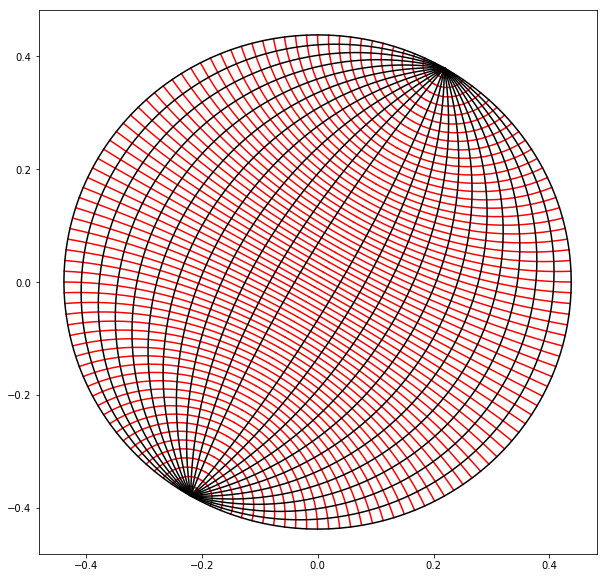

In [7]:
from pymidas.rectgrid_gen import supergrid
tripolar_n=supergrid(Ni,Nj_ncap,'spherical','degrees',lat0_bp,lenlat_bp,lon_bp,lenlon,tripolar_n=True)
tripolar_n.grid_metrics()
tripolar_n.write_nc('ncap_supergrid.nc')
print ("generated a tripolar supergrid of size (ny,nx)= ",tripolar_n.y.shape[0]-1,tripolar_n.y.shape[1]-1)
print ("tripolar grid starting longitude = ",tripolar_n.x[0,0])
print ("tripolar grid starting latitude = ",tripolar_n.y[0,0])
print (np.shape(tripolar_n.x) , np.shape(tripolar_n.y))

plt.figure(figsize=(10,10))
plot_mesh_in_xyz(tripolar_n.x, tripolar_n.y, stride=20)

### MIDAS algorithm based on Murray 96

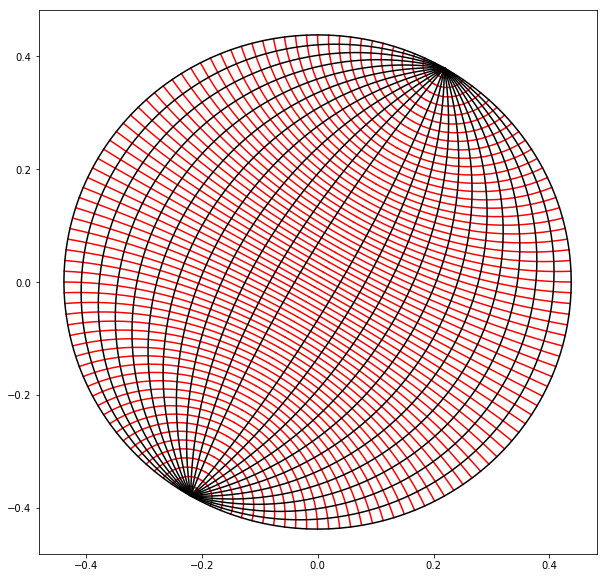

In [8]:
#Spherical grid 
sp_lon_cap = lon_bp  + np.arange(Ni+1) * lenlon/Ni 
sp_lat_cap = lat0_bp + np.arange(Nj_ncap+1) * lenlat_bp/Nj_ncap
lon_cap = np.tile(sp_lon_cap,(Nj_ncap+1,1)) 
lat_cap = np.tile(sp_lat_cap.reshape((Nj_ncap+1,1)),(1,Ni+1))

rp_MIDAS=np.tan(0.5*(90-lat0_bp)*PI_180) #Murray section 2.2 before Eq(6) r_p=tan(\phi_P\prime /2) 
                                                   #where \phi_P is the latitude of the bounding parrallel lat0
chi_MIDAS=2.0*np.arctan(np.tan(0.5*(90-lat_cap)*PI_180)/rp_MIDAS) #Murray Inverse of Eq(5b) 
#lamc = 0.5*np.pi - chi  #Why??????????
#lamc[:,:(nxtot//2)] = lamc[:,:(nxtot//2)] - np.pi/2
#lamc[:,(nxtot//2):] =-lamc[:,(nxtot//2):] + np.pi/2
#OR equivalently
lamc_MIDAS = - chi_MIDAS  #Why??????????
lamc_MIDAS[:,:(Ni//2)] =  lamc_MIDAS[:,:(Ni//2)] 
lamc_MIDAS[:,(Ni//2):] =- lamc_MIDAS[:,(Ni//2):] 
##phic=self.bp_colat() #Why is this co-lat in  MIDAS?
phic_MIDAS=mdist(lon_cap,lon_bp) *PI_180
##phic=(sp_grid_x-lon0) *PI_180 
chic_MIDAS =np.arccos(np.sin(phic_MIDAS)*np.cos(lamc_MIDAS))    #Murray Eq(6) assuming phic is 90-phic !! ***********??
#chic =np.arccos(np.cos(phic)*np.cos(lamc))    #Murray Eq(6) the grid does not make sense !!
phis_MIDAS = 90 - np.arctan(rp_MIDAS*np.tan(chic_MIDAS/2.0)) * 2/PI_180 #Murray Eq(5b) for \phi_s
lams_MIDAS = np.arctan(np.tan(phic_MIDAS)*np.sin(lamc_MIDAS)) /PI_180   #Murray part of Eq(5a)  assuming phic is 90-phic !!
#The following gymnastics in Midas is missing from Murray paper. 
#Does this accomplish 90-atan(sin(\lambda_c)tan(\phi_c))?
lams_MIDAS[:,:Ni//4]=-lams_MIDAS[:,:Ni//4]
lams_MIDAS[:,Ni//4]=90.0
lams_MIDAS[:,Ni//4+1:Ni//2]=180.0-lams_MIDAS[:,Ni//4+1:Ni//2]
lams_MIDAS[:,Ni//2]=180.
lams_MIDAS[:,Ni//2+1:3*Ni//4]=180.0-lams_MIDAS[:,Ni//2+1:3*Ni//4]
lams_MIDAS[:,3*Ni//4]=270.
lams_MIDAS[:,3*Ni//4+1:]=360.-lams_MIDAS[:,3*Ni//4+1:]
lams_MIDAS = lams_MIDAS + lon_bp #Murray part of Eq(5a)  

plt.figure(figsize=(10,10))
plot_mesh_in_xyz(lams_MIDAS, phis_MIDAS, stride=20)

### FMS algorithm 

The algorithm used in FMS code is also based on Murray96 but is slightly different from MIDAS https://gitlab.gfdl.noaa.gov/fre/fre-nctools/blob/master/tools/shared/tool_util.c#L291 

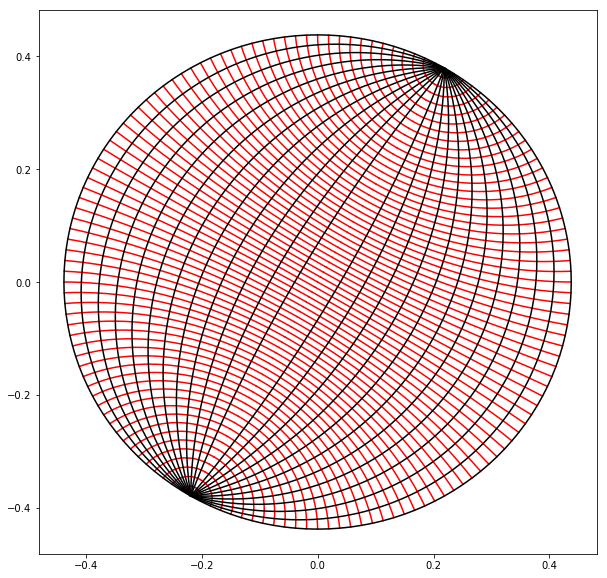

In [9]:
def mdist(x1,x2):
  """Returns positive distance modulo 360."""
  a=np.mod(x1-x2+720.,360.)
  b=np.mod(x2-x1+720.,360.)
  d=np.minimum(a,b)
  return d

def bp_lam(x,y,bpeq,rp):
    """bp_lam = ((90-y)/(90-lat_join))*90
       invert Murray's eqn. 5b with phic=0 to place point at specified geo. lat """
    bp_lam = 2.*np.arctan(np.tan((0.5*np.pi-y*PI_180)/2)/rp)/PI_180
    bp_lam = np.where(mdist(x,bpeq)<90.,-bp_lam, bp_lam)
    return bp_lam    

def bp_phi(x,y,bpsp,bpnp):
    bps = mdist(x,bpsp)
    bpn = mdist(x,bpnp)
    bp_phi = np.where(bps<90,-90+bps,90-bpn)
    return bp_phi

rp=np.tan(0.5*(90-lat0_bp)*PI_180) #Murray section 2.2 before Eq(6) r_p=tan(\phi_P\prime /2) 
                                                   #where \phi_P is the latitude of the bounding parrallel lat0

lamc_fms = bp_lam(lon_cap,lat_cap,lon_bp+90,rp) 
phic_fms = bp_phi(lon_cap,lat_cap,lon_bp,lon_bp+180)
lams_fms = lon_bp + 90*0 - np.arctan2(np.sin(lamc_fms*PI_180),np.tan(phic_fms*PI_180))/PI_180 #eqn.5a
#Note the *0:          |
#The original grid is rotated 90 degrees compared to both MIDAS and new

chic_fms = np.arccos(np.cos(lamc_fms*PI_180)*np.cos(phic_fms*PI_180)) #eqn.6
phis_fms = 90 - 2 * np.arctan(rp*np.tan(chic_fms/2))/PI_180


#plt.plot(phis_fms);
#plot_grid( lams_fms,phis_fms, lam_cap,phi_cap,lon0=lon_p, lat0=lat_p, dlat=10, dlon=5)
plt.figure(figsize=(10,10))
plot_mesh_in_xyz(lams_fms, phis_fms, stride=20)

### Explore 

This grid differs from the one generated from MIDAS by what seems to be roundoff.

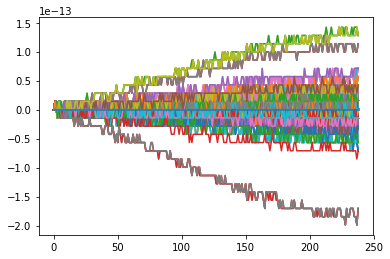

In [10]:
plt.plot(phis-phis_MIDAS);

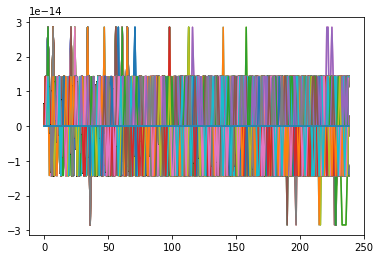

In [11]:
plt.plot(phis_fms-phis_MIDAS);

### Compare the generated metrics with known exact results

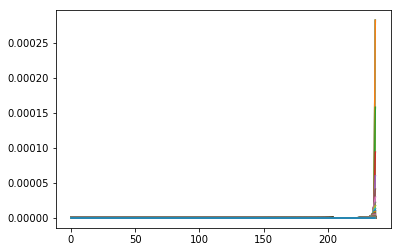

In [12]:
plt.plot(dy2-dy);

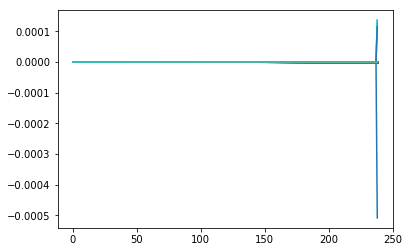

In [13]:
plt.plot(dx2-dx);

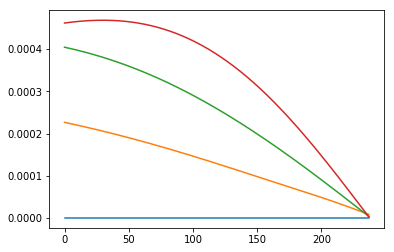

In [14]:

plt.plot((dy2[:,Ni//4]-dy[:,Ni//4])/sym_delPhi/PI_180)
plt.plot((dy2[:,Ni//6]-dy[:,Ni//6])/sym_delPhi/PI_180)
plt.plot((dy2[:,Ni//8]-dy[:,Ni//8])/sym_delPhi/PI_180)
plt.plot((dy2[:,Ni//16]-dy[:,Ni//16])/sym_delPhi/PI_180)

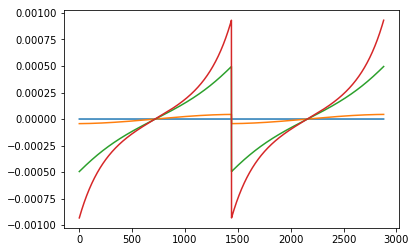

In [15]:
plt.plot((dx2[0,:]-dx[0,:])/lat0_delLam/PI_180,label='new')
plt.plot((dx2[10,:]-dx[10,:])/lat0_delLam/PI_180,label='new')
plt.plot((dx2[100,:]-dx[100,:])/lat0_delLam/PI_180,label='new')
plt.plot((dx2[200,:]-dx[200,:])/lat0_delLam/PI_180,label='new')
